<a href="https://colab.research.google.com/github/vinigoia/DETECCAO-DE-FRAUDES-BANCARIAS/blob/main/Modelo_para_Detec%C3%A7%C3%A3o_de_Fraudes_Banc%C3%A1rias_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELOS PARA DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO**

_______________________________________________________________________________


## ***Se você está com pressa!!!***
________________________________________________________________________________

Com todas as facilidades que a digitalização de processos gera, inevitavelmente o grande número de adaptos atrai caçadores de recompensas os quais querem dinheiro fácil. Fraudes em cartões de crédito é o tema central desse estudo, focado em sua detecção através de técnicas de Machine Learning. A análise de um dataset disponibilizado publicamente com informações pessoais descaracterizadas e a aplicação de modelos supervisionados, como Regressão Logística e Árvores de Decisão, gerou métricas interessantes tanto para aplicações de produção quanto para geração de insights.

## ***Contextualizando...***

_______________________________________________________________________________

Não devemos negar as grandes facilidades que o meio digital nos proporcionou e nos proporciona até hoje. Realizar compras sem sair de casa, ver notícias em tempo real, redes sociais, comunicação e por aí vai. Porém todo esse ambiente fomenta grupos criminosos à praticarem golpes que afetam tanto as instituições como as pessoas comuns. 
_______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/alto-angulo-de-cartao-de-credito-com-gancho-para-phishing_23-2148578117.jpg?w=1380&t=st=1672716842~exp=1672717442~hmac=89df6b1502da09a6f002e7b1342f9457a675868d33c432cdec1526959789b018" width="60%"></p>

_______________________________________________________________________________
Segundo o [Estadão](https://www.estadao.com.br/economia/golpes-bancarios-geram-prejuizos-no-pais/#:~:text=Existem%20outras%20evid%C3%AAncias%20de%20que,ou%20mais%20de%20176%20mil
), um levantamento feito pela **Serasa Experian** mostrou que, em maio de 2021, um total de 331,2 mil brasileiros foram vítimas de algum tipo de fraude, sendo que **53,3%** se concentraram em contas bancárias ou em cartões de crédito (ou mais de 176 mil ocorrências).

E o problema parece ser mais grave no Brasil. Em um estudo de fevereiro de 2022, a gigante americana IBM revelou que 31% dos brasileiros afirmaram ter sofrido algum tipo de golpe relacionado a cartões de crédito ao longo do ano anterior. Na Alemanha, por exemplo, esse número foi de 7% e nos Estados Unidos, de 18%.

As fraudes bancárias são apenas uma ramificação das áreas que golpistas podem atuar, conforme figura abaixo. Segundo Dornadula & Geetha (2019), fraudadores sempre tentam fazer com que as transações fraudulentas se pareçam legítimas, o que dificulta muito a sua percepção.

_______________________________________________________________________________

<p align=center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S1084804516300571-gr9.jpg" width="60%"></p>

_______________________________________________________________________________

Gigantes da tecnologia, como a Amazon, disponibilizam soluções em machine learning para prevenção dessas fraudes, reduzindo as perdas de receita, evitando danos à marca e fornecendo experiências online sem atritos ao cliente enquanto se adaptam aos padrões de ameaças em constante mudança. De acordo com Domashova & Zabelina (2021), empresas como IBM, FICO E SAS também lideram em disponibilização de sistemas anti-fraude.

Aliás, **Machine Learning** nada mais é do que um conjunto de algoritmos que têm a capacidade de aprender algo a partir de dados históricos. De certa forma, adquirem experiência com os dados e realizam certa tarefa pré-definida, sem a necessidade de uma nova programação.
_______________________________________________________________________________

## ***Sobre os Dados***
______________________________________________________________________________

O dataset à ser estudado aqui está disponível no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) para download. Trata-se de um dataset que contém as transações de cartão de crédito feitas por europeus em setembro de 2013. Foi coletado e analisado durante uma pesquisa de colaboração do grupo *Worldline and Machine Learning* da UBL (Universitá Libre de Bruxelles) para detecção de fraudes.

Nele encontram-se apenas variáveis núméricas resultantes da aplicação do PCA. *Principal Component Analysis*, segundo [Casey Cheng](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d), é uma técnica que transforma conjuntos grandes de dados em dimensões menores sem muita perda de informação. É como se diminui-se a variação dos dados em uma escala menor.

Outra particularidade do dataset é que, devido à questões de confidencialidade, as *features* foram descaracterizadas, sendo as colunas apresentadas como *V1, V2, ... V28*. Apenas as colunas *Time* e *Amount* se mantiveram originais.

### **Dicionário de Variáveis**
______________________________________________________

Sendo assim, as únicas variáveis disponíveis são:

* `Time` : tempo, em segundos, entre cada transação com relação a primeira transação do dataset;

* `Amount` : valor da transação;

* `Class` : variável que define o tipo de transação. 1 para fraudulenta e 0 para normal.

Para a utilização dos dados, primeiramente importou-se as bibliotecas necessárias. Os dados foram disponibilizados neste [link](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1) para facilitar a manipulação.

Visualizou-se também as primeiras entradas para uma idéia geral do dataset.

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd

# Leitura do arquivo .csv em um dataframe
data_bank = pd.read_csv ("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# Visualização das primeiras entradas
data_bank.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

É de extrema importância verificarmos nesse primeiro contato o que o dataset nos informa. Iremos utilizar duas funções que mostram informações gerais do conjunto: *info()* e *describe()*.

In [ ]:
# Obtendo descrição das variáveis
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observa-se que a maioria dos valores são *floats* e apenas uma coluna possui dados *inteiros*. Outro ponto é que não há valores ausentes. Um bom sinal!

In [ ]:
# Verificação da porcentagem de dados ausentes
data_bank.isnull().sum() / data_bank.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [ ]:
# Obtendo resumo dos atributos numéricos
data_bank.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Com 284807 transações, tem-se apenas 492 lançamentos classificados como fraude, segundo a própria descrição do dataset no site. Vamos verificar esses valores.

In [ ]:
# Contagem das classificações
data_bank.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Importação de bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo de plotagem
sns.set_style('dark')

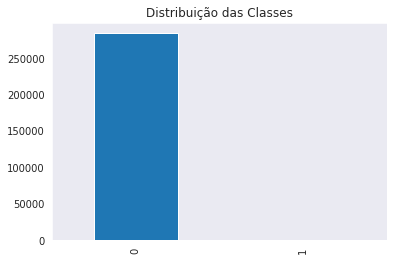

In [ ]:
# Configuração para plotagem das frequências de fraudes
fig, ax = plt.subplots()

data_bank.Class.value_counts().plot(kind='bar', ax=ax)

ax.set_title ("Distribuição das Classes")

plt.show()

In [ ]:
# Verificação da porcentagem de fraudes
perc = (data_bank.Class.value_counts()[1]/data_bank.shape[0])*100

print("A porcentagem de transações fraudulentas no dataset é de {0:4.3f}%".format(perc,))

A porcentagem de transações fraudulentas no dataset é de 0.173%


Com isso, observa-se que os dados dessas classificações estão bastante desbalanceados. Dessa maneira, para aplicação de Machine Learning, teremos que balancear esses dados através de técnicas especificas, as quais veremos mais adiante.

Vamos verificar agora em qual faixa de valores se encontram as transações fraudulentas.

In [ ]:
# Obtendo resumo dos atributos numéricos para as transações fraudulentas
data_bank.Amount.loc[data_bank.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


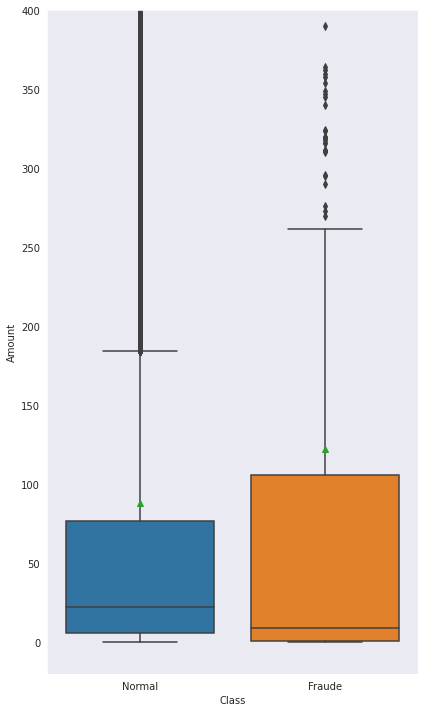

In [ ]:
# Configurações para plotagem de boxplot
fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot(data_bank.Class,data_bank.Amount,showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()
plt.show()

Os *boxplots* indicam diversos valores *outliers*. Isso sugere que provavelmente essa coluna não foi padronizada como as outras. Tal fato pode prejudicar as predições realizadas pelos modelos de machine learning. Portanto, iremos padronizar as colunas *Time* e *Amount* em um novo dataset. Mas antes, vamos verificar em quais valores as fraudes são frequentes.

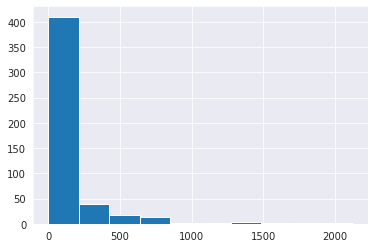

In [ ]:
# Plotagem de histograma para visualização de frequência de fraudes
data_bank.Amount.loc[data_bank.Class==1].hist()

Para este dataset, observa-se que a maioria das transação fraudulentas são realizadas com valores teoricamente baixos.

Veremos agora o valor total dessas transações.

In [ ]:
# Verificação do valor total das transações fraudulentas
total_fraud = data_bank.Amount.loc[data_bank.Class==1].sum()

print("O total de prejuízo gerado aos bancos foi de {}".format(total_fraud))

O total de prejuízo gerado aos bancos foi de 60127.97


Realizaremos a plotagem da frequência dos movimentos fraudulentos com relação ao tempo para verificação de algum insight.

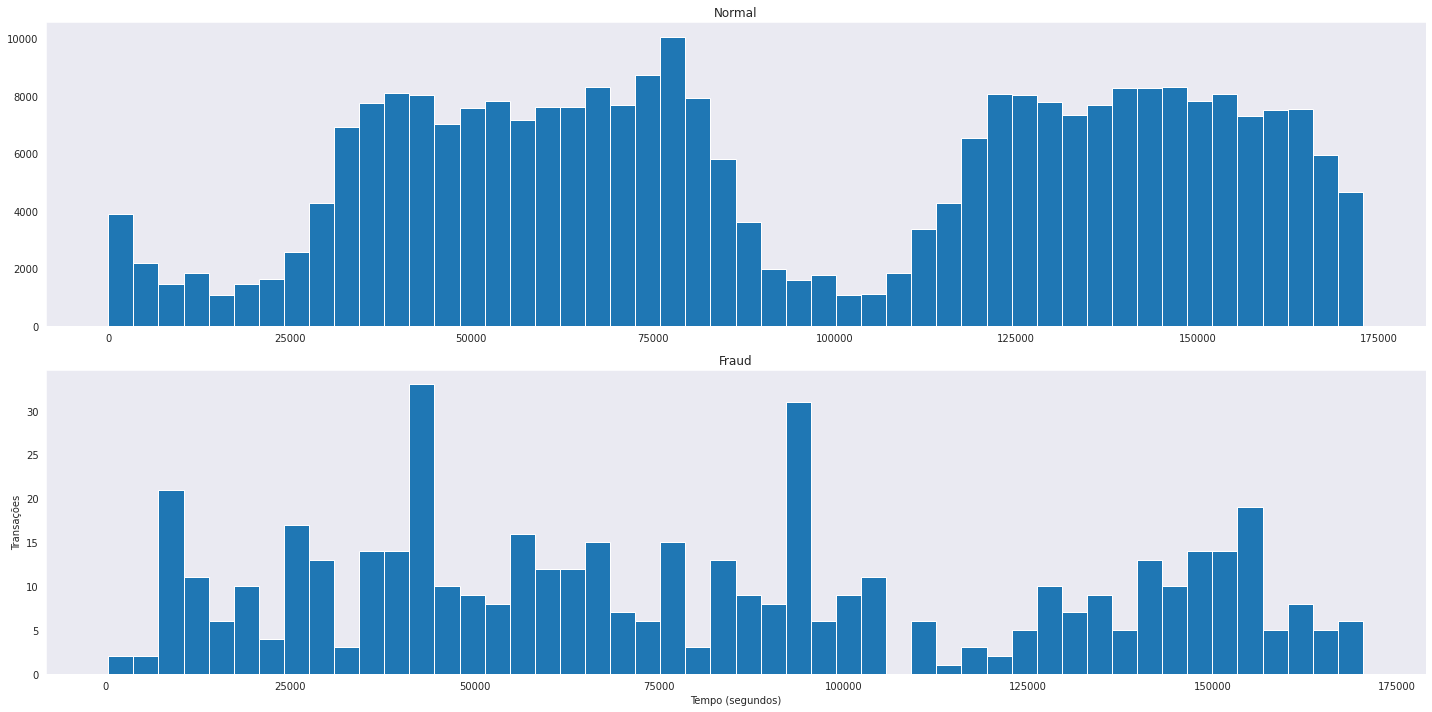

In [ ]:
# Configurações para plotagem de frequencia de fraudes com relação ao tempo
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

num_bins = 50

ax[0].hist(data_bank.Time[data_bank.Class==0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(data_bank.Time[data_bank.Class==1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Como observado, nenhum insight significativo foi gerado com os gráficos.

Antes de iniciarmos nossas manipulações, iremos dividir o conjunto de dados em Treino e Teste, seguindo os passos abaixo:

In [ ]:
# Dimensões do conjunto original
print("Dimensões do Conjunto Original: ", data_bank.shape)

# Criando o conjunto de teste
test = data_bank.sample(frac=0.15, random_state=0)

# Drop das linhas de teste
data_bank = data_bank.drop(test.index)

# Verificação do conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", data_bank.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


## ***Preparando o Terreno***
________________________________________________________________________________

### **Padronização dos dados existentes**
________________________________________________________________________________

A partir de agora, iremos realizar as preparação dos dados para que nossos modelos de machine learning possam performar de maneira adequada.

Como comentado anteriormente, padronizaremos os valores das colunas que se mantiveram originais ao dataset.

In [ ]:
# Importação de biblioteca necessária
from sklearn.preprocessing import StandardScaler

# Cópia do dataset original
data_mach = data_bank.copy()

# Padronização das colunas Time e Amount em novas colunas
std_scaller = StandardScaler()
data_mach['std_amount'] = std_scaller.fit_transform(data_mach.Amount.values.reshape(-1,1))
data_mach['std_time'] = std_scaller.fit_transform(data_mach.Time.values.reshape(-1,1))

# Exclusão das colunas existentes
data_mach.drop(['Time','Amount'], axis=1, inplace=True)

# Visualização das primeiras entradas
data_mach.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### **Divisão dos dados de treino e validação**
________________________________________________________________________________

Dividiu-se os dados para a realização dos procedimentos de teste e validação. Como nossos modelos de machine learning possuirão características de sistemas supervisionados, iremos também dividir os dados em conjunto de *features* e conjunto de *target*.

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.model_selection import train_test_split

# Divisão do dataset em features e target
X = data_mach.drop('Class', axis=1)
y = data_mach.Class

# Divisão dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split (X, y)

print(
    "Tamanho do conjunto X: {}\n".format(X.shape),
    "Tamanho do conjunto y: {}\n".format(y.shape),
    "Tamanho do conjunto X_train: {}\n".format(X_train.shape),
    "Tamanho do conjunto X_val: {}\n".format(X_val.shape),
    "Tamanho do conjunto y_train: {}\n".format(y_train.shape),
    "Tamanho do conjunto y_val: {}\n".format(y_val.shape)
)

Tamanho do conjunto X: (242086, 30)
 Tamanho do conjunto y: (242086,)
 Tamanho do conjunto X_train: (181564, 30)
 Tamanho do conjunto X_val: (60522, 30)
 Tamanho do conjunto y_train: (181564,)
 Tamanho do conjunto y_val: (60522,)



### **Balanceamento dos dados de Target**
________________________________________________________________________________

Dados desbalanceados indicam entropia baixa. Neste caso, com 0,173% de dados demarcados como fraude, temos praticamente um conjunto puro, o que dificiulta o entendimento do algoritmo de classificação. Para a resolução deste problema, iremos utilizar o método *Random Under-sampling (RUS)*, que, segundo Moreira (2022), descarta um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, favorecendo grandes volumes de dados.

0    311
1    311
Name: Class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


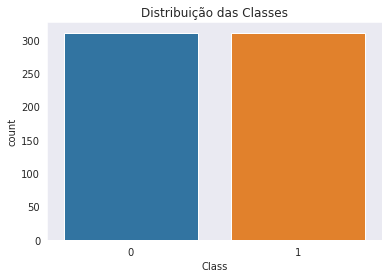

In [ ]:
# Importação de bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

# Usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de classes
fig, ax = plt.subplots()

sns.countplot(y_rus, ax=ax)

ax.set_title ("Distribuição das Classes")

plt.show()

Observa-se claramente no gráfico que os dados foram balanceados.

Abaixo comparamos a matriz de correlação antes e depois do processo. Sem dúvidas os dados passaram a se correlacionar melhor após o balanceamento.

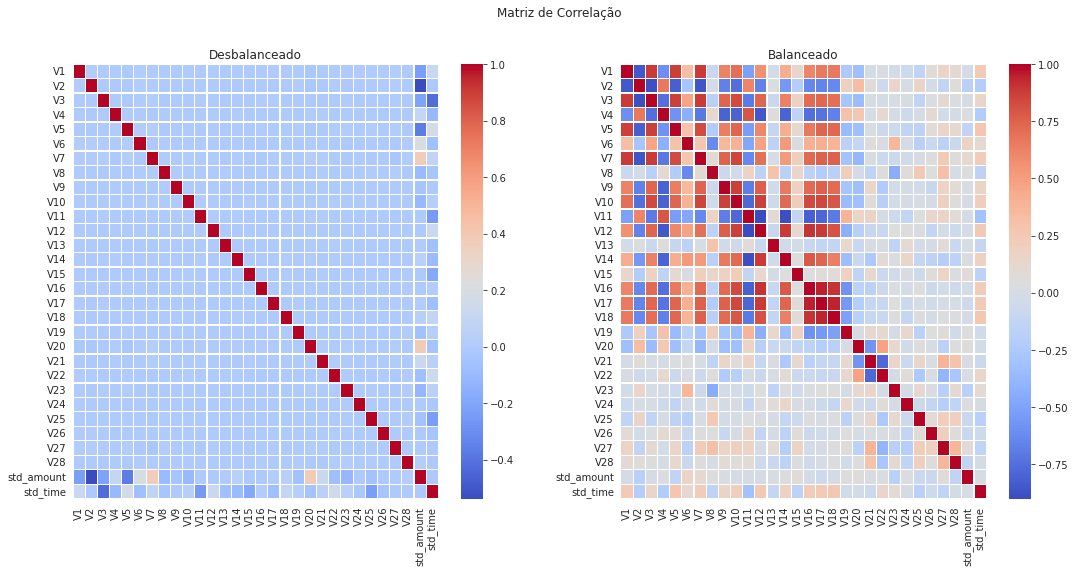

In [ ]:
# Plotagem de matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## ***Modelos de Machine Learning***
________________________________________________________________________________

De acordo com Moreira (2022), as técnicas de aprendizado supervisionado mais comuns utilizadas em detecção de fraudes são as variantes de árvore de decisão, redes neurais, regressão linear, regressão logística, KNN e Naive Bayes.

Para este estudo iremos comparar o desempenho das técnicas de Regressão Logística e Árvores de Decisão.

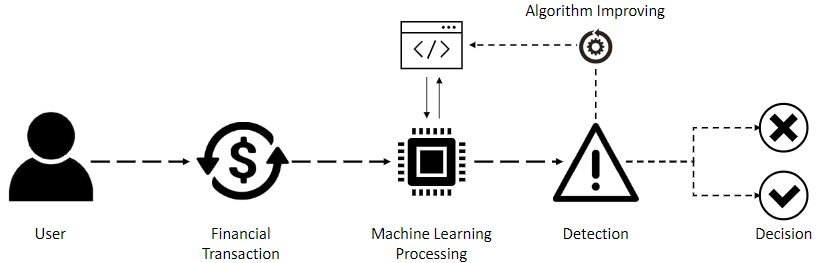

Na figura acima podemos verificar o processo de implementação de machine learning em um sistema financeiro.

### **Regressão Logística**
________________________________________________________________________________

Aqui iremos descrever em forma de código os passos para construção do modelo.

In [ ]:
# Importação de biliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9550    0.9769     60415
           1     0.0351    0.9252    0.0677       107

    accuracy                         0.9549     60522
   macro avg     0.5175    0.9401    0.5223     60522
weighted avg     0.9982    0.9549    0.9753     60522

Acurácia: 0.9549

AUC: 0.9401



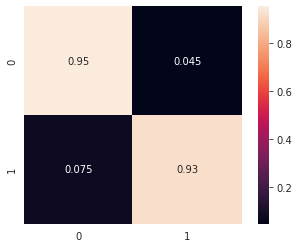

In [ ]:
# Instanciamento e escolha dos hiperparâmetros
model1 = LogisticRegression()

# Treinamento do Modelo
model1.fit(X_rus, y_rus)

# Previsões em cima dos dados de teste
y_pred = model1.predict(X_val)
y_proba = model1.predict_proba(X_val)

# Plote de matrix de confusão
mat = confusion_matrix (y_val, y_pred, normalize='true')
sns.heatmap (mat, square=True, annot=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

### **Previsões com o conjunto Teste**
________________________________________________________________________________

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. 

Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera.

Nesse caso, precisamos padronizar as colunas Time e Amount. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber.


In [ ]:
# Padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9570    0.9780     42647
           1     0.0373    0.9595    0.0717        74

    accuracy                         0.9570     42721
   macro avg     0.5186    0.9582    0.5248     42721
weighted avg     0.9983    0.9570    0.9764     42721

Acurácia: 0.9570

AUC: 0.9582



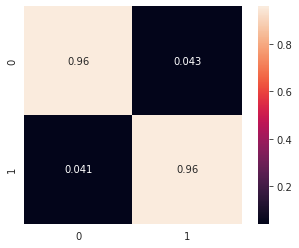

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

# fazer as previsões em cima dos dados de teste
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)

# plotar a matrix de confusão
mat = confusion_matrix (y_test, y_pred, normalize='true')
sns.heatmap (mat, square=True, annot=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Neste caso, houve um mínimo aumento nos resultados no conjunto de testes.

### **Árvore de Descisão**
________________________________________________________________________________

Aqui iremos descrever em forma de código os passos para construção do modelo.

In [ ]:
# Importação de biliotecas necessárias
from sklearn.tree import DecisionTreeClassifier

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9456    0.9720     60415
           1     0.0293    0.9252    0.0567       107

    accuracy                         0.9456     60522
   macro avg     0.5146    0.9354    0.5144     60522
weighted avg     0.9981    0.9456    0.9704     60522

Acurácia: 0.9456

AUC: 0.9354



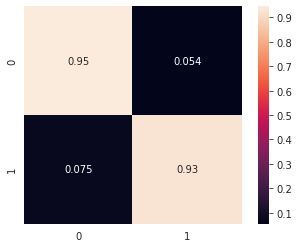

In [ ]:
# Instanciamento e escolha dos hiperparâmetros
model2 = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# Treinamento do Modelo
model2.fit(X_rus, y_rus)

# Previsões em cima dos dados de teste
y_pred = model2.predict(X_val)
y_proba = model2.predict_proba(X_val)

# Plote de matrix de confusão
mat = confusion_matrix (y_val, y_pred, normalize='true')
sns.heatmap (mat, square=True, annot=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

### **Previsões com o conjunto Teste**
________________________________________________________________________________


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9475    0.9729     42647
           1     0.0282    0.8784    0.0546        74

    accuracy                         0.9473     42721
   macro avg     0.5140    0.9129    0.5138     42721
weighted avg     0.9981    0.9473    0.9713     42721

Acurácia: 0.9473

AUC: 0.9129



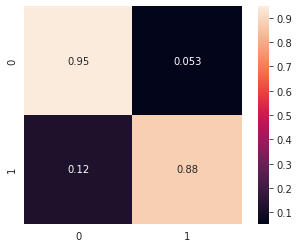

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)

# plotar a matrix de confusão
mat = confusion_matrix (y_test, y_pred, normalize='true')
sns.heatmap (mat, square=True, annot=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Neste caso, houve uma mínima diminuição nos resultados no conjunto de testes.

## ***Conclusão***
______________________________________________________________________________

A construção de modelos de Machine Learning exige do cientista de dados o entendimento mínimo do business para gerar valor ao cliente. Definir bem as métricas de avaliação também é um ponto importante. Em nosso estudo, observamos que o modelo de Regressão Logística se sobressaiu ao modelo de Árvores de Descisão. Na detecção de fraudes é muito importante analisarmos de forma crítica não apenas os valores falsos negativos, mas também os falsos positivos, que geram alertas e podem fragilizar a relação entre instituição e cliente.

Percebemos também que o dataset, apesar de estar bem estruturado, sem valores ausentes, demandou métodos para a adequação de dados para aplicação nos algoritmos. Isso evidencia que o profissional deve não apenas aplicar técnicas decoradas, mas analisar cuidadosamente e explorar tudo o que for possível.

Para otimizar ainda mais os modelos aqui apresentados, outra técnicas de balanceamento poderiam ser utilizadas, bem como outros algoritmos de Machine Learning supervisionados.



## ***Referências***
______________________________________________________________________________


* ​​Domashova, J., & Zabelina, O. (2021). Detection of fraudulent transactions using SAS Viya machine learning algorithms. Procedia Computer Science, 190, 204–209. https://doi.org/10.1016/j.procs.2021.06.025 

* Dornadula, V. N., & Geetha, S. (2019). Credit Card Fraud Detection using Machine Learning Algorithms. Procedia Computer Science, 165, 631–641. https://doi.org/10.1016/j.procs.2020.01.057 

* ​Moreira, M. Â. L., Junior, C. de S. R., Silva, D. F. de L., de Castro Junior, M. A. P., Costa, I. P. de A., Gomes, C. F. S., & dos Santos, M. (2022). Exploratory analysis and implementation of machine learning techniques for predictive assessment of fraud in banking systems. Procedia Computer Science, 214, 117–124. https://doi.org/10.1016/j.procs.2022.11.156 